In [1]:
import sys
sys.path.append("../")

import numpy as np
from data.data_gen import simulation_run
from lib.nsindy import train_prune, test
import lib.utils as utils
import random
from random import SystemRandom
import os

import torch
torch.set_default_dtype(torch.float64) 

/Users/klee263/venv-nsindy/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
save_path = 'experiments/'                                                                            
utils.makedirs(save_path)
experimentID = 86112#int(SystemRandom().random()*100000)                                                    
ckpt_path = os.path.join(save_path, "experiment_" + str(experimentID) + '.ckpt')                      
fig_save_path = os.path.join(save_path,"experiment_"+str(experimentID))                               
utils.makedirs(fig_save_path)
print(ckpt_path)  

experiments/experiment_86112.ckpt


In [3]:
T = 51.2
dt = 0.01
N_steps = int(np.floor(T/dt)) + 1
train_data, val_data, test_data, t = simulation_run("cubic", T, dt, 10, 10, 10)

generating training trials ...
generating validation trials ...
generating testing trials ...


In [6]:
from lib.odefunc import ODEfuncPoly
odefunc = ODEfuncPoly(2, 3)

In [7]:
train_prune(odefunc, 1e-2, 500, 100, 100, 10, "dopri5", train_data,val_data,t,ckpt_path,fig_save_path)

0 0.024359842394832347
val loss 0.28939257575478755
saving... 0.28939257575478755
1 0.021183840583722968
val loss 0.2879119725425114
saving... 0.2879119725425114
2 0.02704416113217768
val loss 0.31924996604883366
3 0.01171220760525217
val loss 0.31326438082868435
4 0.006533025841357725
val loss 0.3334102658275951
5 0.006930985662481668
val loss 0.18252012629093686
saving... 0.18252012629093686
6 0.0031868706040758584
val loss 0.11508388169819858
saving... 0.11508388169819858
7 0.0021818593212371293
val loss 0.12804893359199107
8 0.0010267397129811785
val loss 0.052639507056501604
saving... 0.052639507056501604
9 0.0007743087375527168
val loss 0.05952780469939005
10 0.0012968552612613472
val loss 0.06836655194790284
11 0.0005704664983298903
val loss 0.019011212353103237
saving... 0.019011212353103237
12 0.0007149658316298181
val loss 0.05228195830868056
13 0.0007785723768525604
val loss 0.060999806950343106
14 0.0006631065661959589
val loss 0.011294686260699405
saving... 0.0112946862606

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [8]:
ckpt = torch.load(ckpt_path)
odefunc.load_state_dict(ckpt['state_dict'])

<All keys matched successfully>

test loss 0.0003747986869916143


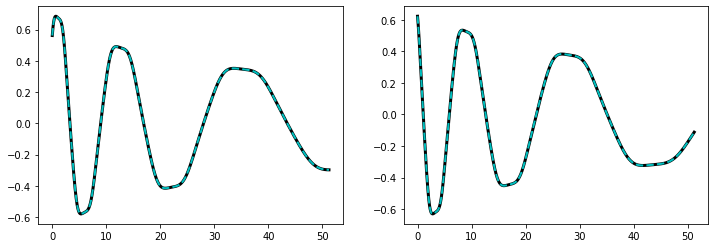

In [9]:
test(odefunc, "dopri5", test_data, t, ckpt_path, fig_save_path)

In [10]:
print(odefunc.C.weight)

tensor([[-0.0000, -0.0000, -0.0000, -0.0998, -0.0000,  0.0000, -0.0000, -0.0000,
         -0.0000,  1.9989],
        [-0.0000, -0.0000, -0.0000, -2.0015, -0.0000, -0.0000, -0.0000, -0.0000,
          0.0000, -0.1003]], grad_fn=<MulBackward0>)


In [11]:
odefunc.get_dict()

$\dot{x_0}-0.09976100590383925x_0^3+1.998900795100517x_1^3$
$\dot{x_1}-2.001497538494885x_0^3-0.1003000196505262x_1^3$
